# July 15 - AE-VAE

In [1]:
# Imports
import math
import os
import sys
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Import the custom plotting module
from plot_utils import plot_utils
import random
import torch

# Label dict - Dictionary mapping integer labels to str
label_dict = {0:"gamma", 1:"e", 2:"mu"}

np.set_printoptions(threshold=np.inf)

def plot_event(run_id, iteration, mode):
    
    dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"
    
    if mode is "validation":
        np_arr_path = dump_dir + "val_iteration_" + str(iteration) + ".npz"
    else:
        np_arr_path = dump_dir + "iteration_" + str(iteration) + ".npz"
    
    # Load the numpy array
    np_arr = np.load(np_arr_path)
    np_event, np_recon, np_labels, np_energies = np_arr["events"], np_arr["prediction"], np_arr["labels"], np_arr["energies"]

    i = random.randint(0, np_labels.shape[0]-1)
    plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                    label_dict[np_labels[i]], np_energies[i].item(),
                                    show_plot=True)

    plot_utils.plot_charge_hist(torch.tensor(np_event).permute(0,2,3,1).numpy(),
                                np_recon, iteration, num_bins=200)
    
def plot_log(run_id, model_name, iteration, variant, mode):

    dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

    # Setup the path to the training log file
    if mode is "training":
        log = dump_dir + "log_train.csv"
    elif mode is "training_validation":
        log = dump_dir + "val_test.csv"
    elif mode is "validation":
        log = dump_dir + "validation_log.csv"
    else:
        print("mode has to be one of training, training_validation, validation")
        return None
    
    downsample_interval = 32 if mode is "training" else None

    if variant is "AE":
        plot_utils.plot_ae_training([log], [model_name], {model_name:["red"]},
                                 downsample_interval=downsample_interval, show_plot=True, legend_loc=(0.8,0.8))
    elif variant is "VAE":
        plot_utils.plot_vae_training([log], [model_name], {model_name:["red", "blue"]},
                                 downsample_interval=downsample_interval, show_plot=True, legend_loc=(0.8,0.8))
        
    if iteration is not None:
        plot_event(run_id, iteration, mode=mode)

## Continuing training VAE without good initialization

## 1. VAE trained on 50000 samples ( No linear layer after reparameterization )

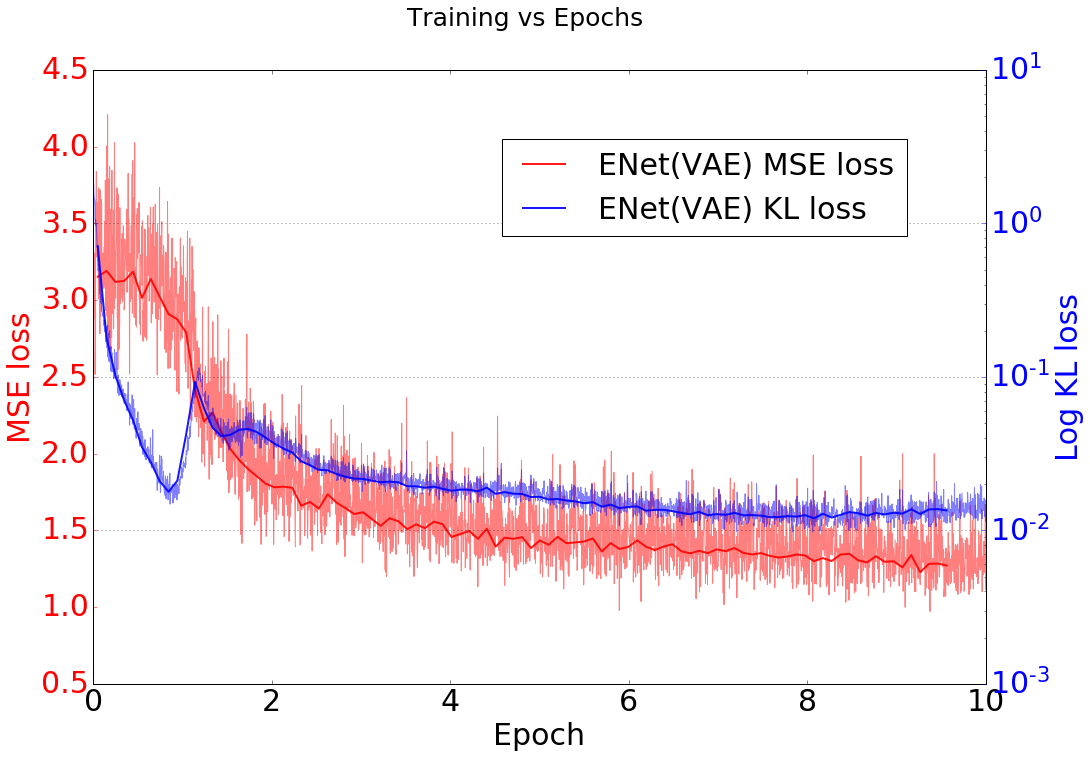

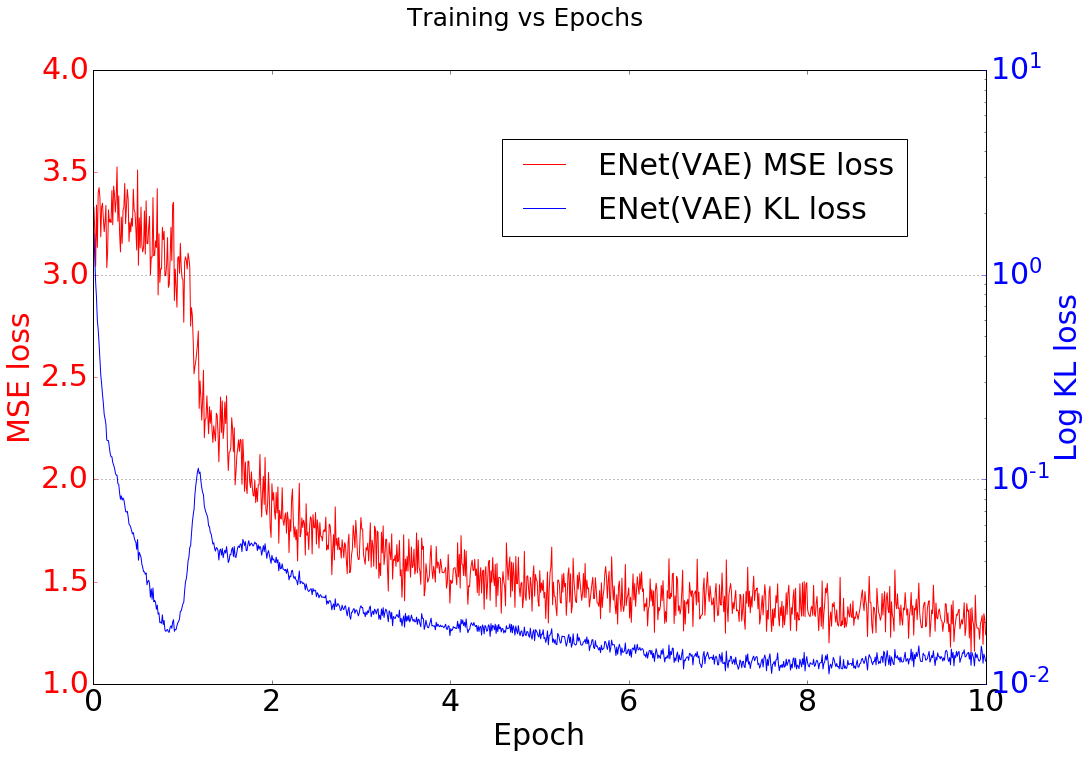

In [8]:
plot_log("20190715_160636", "ENet(VAE)", None, "VAE", "training")
plot_log("20190715_160636", "ENet(VAE)", None, "VAE", "training_validation")

## 2. VAE trained on 720000 samples ( No linear layer after reparameterization )

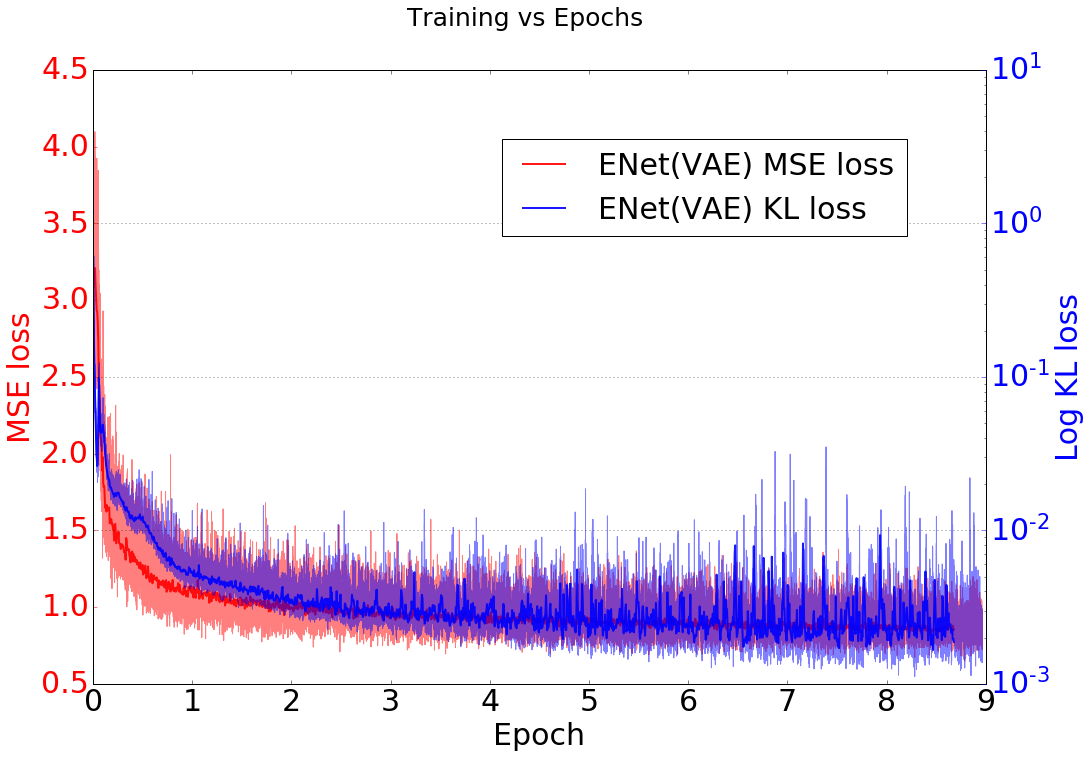

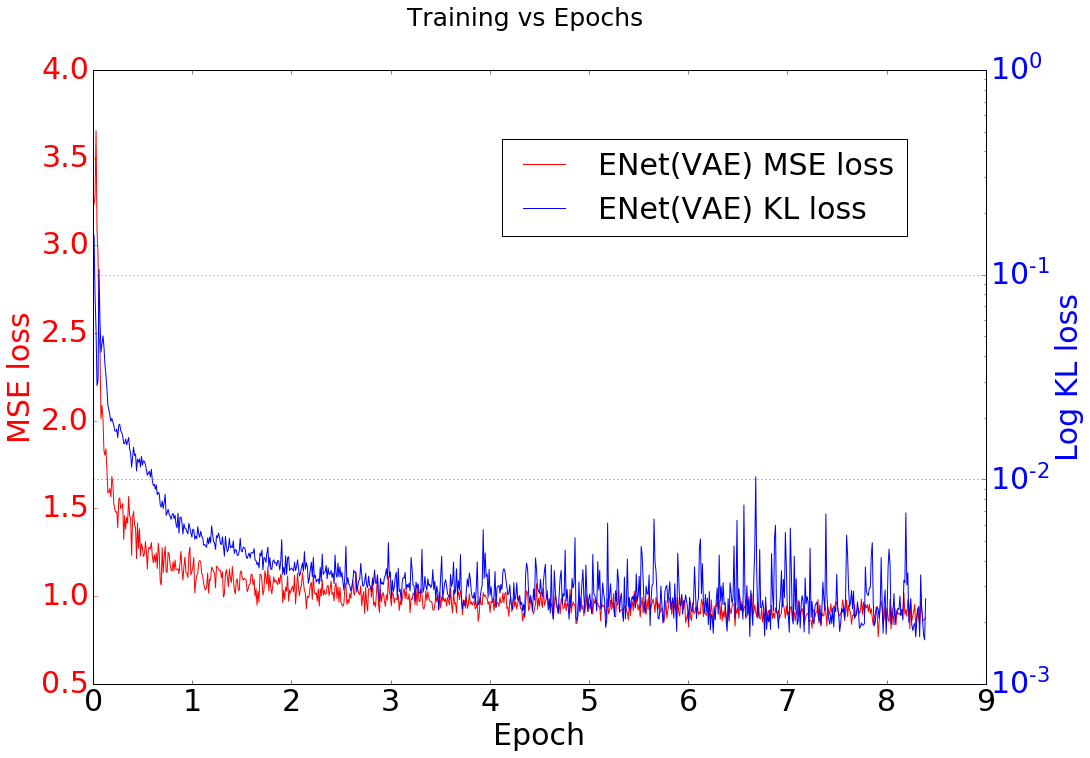

In [12]:
plot_log("20190715_161135", "ENet(VAE)", None, "VAE", "training")
plot_log("20190715_161135", "ENet(VAE)", None, "VAE", "training_validation")

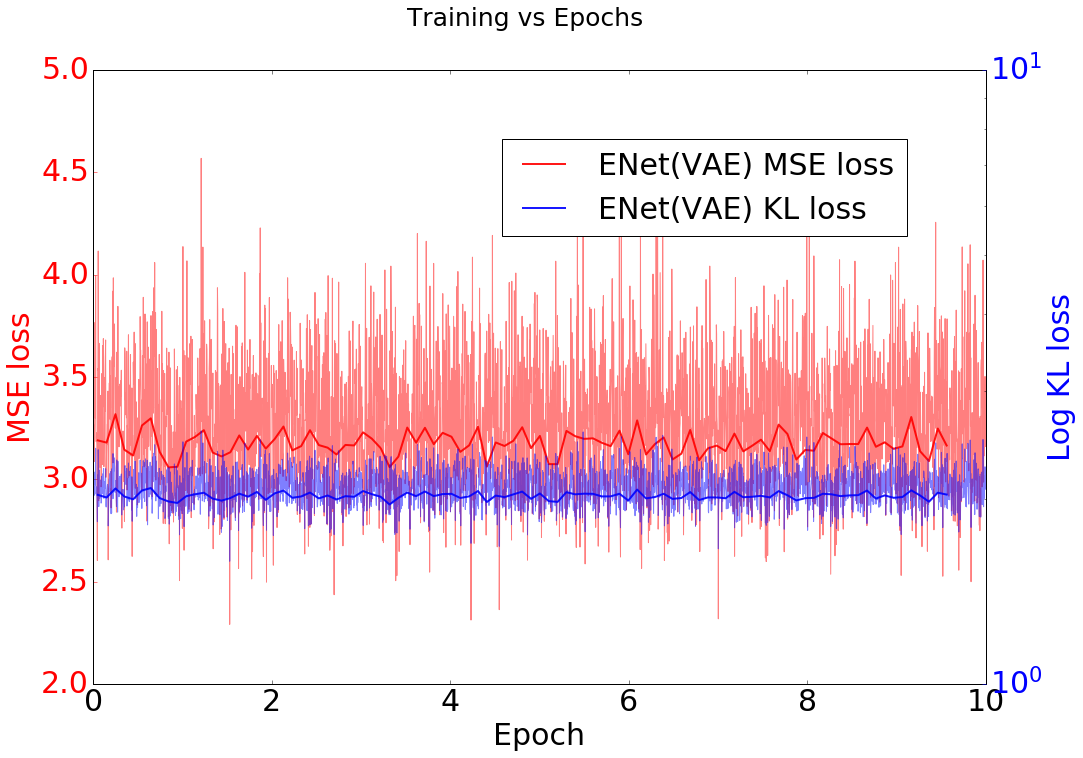

In [9]:
plot_log("20190713_182534", "ENet(VAE)", None, "VAE", "training")

## 3. APEX testing - various initialization configurations

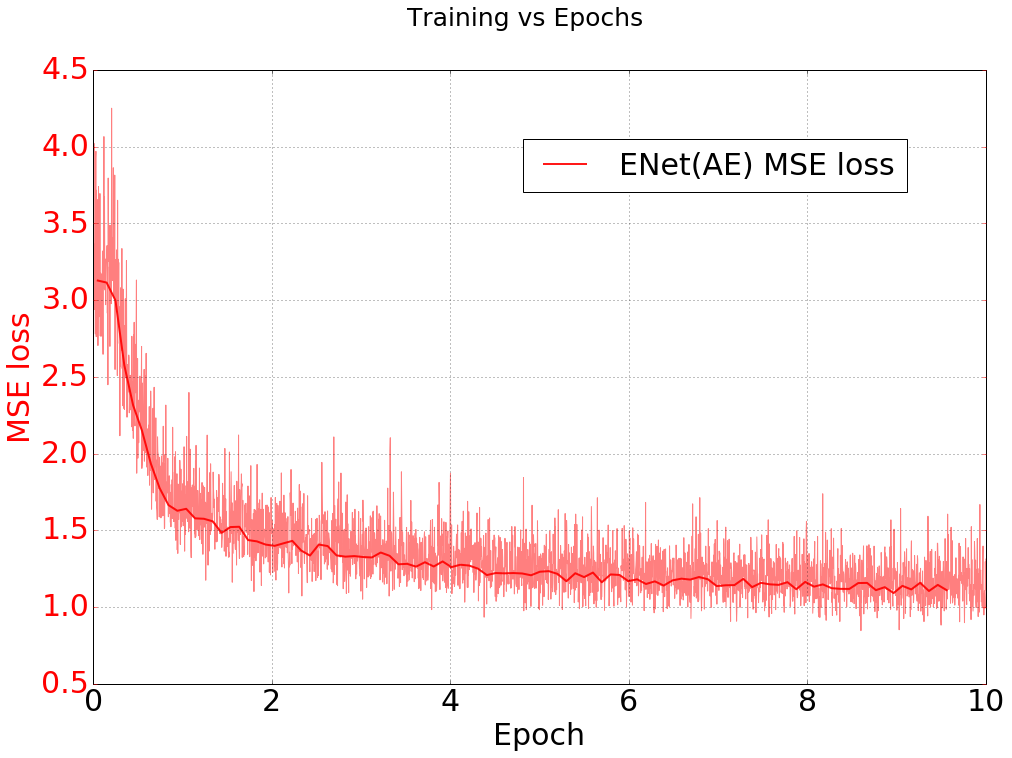

In [10]:
plot_log("20190715_173042", "ENet(AE)", None, "AE", "training")

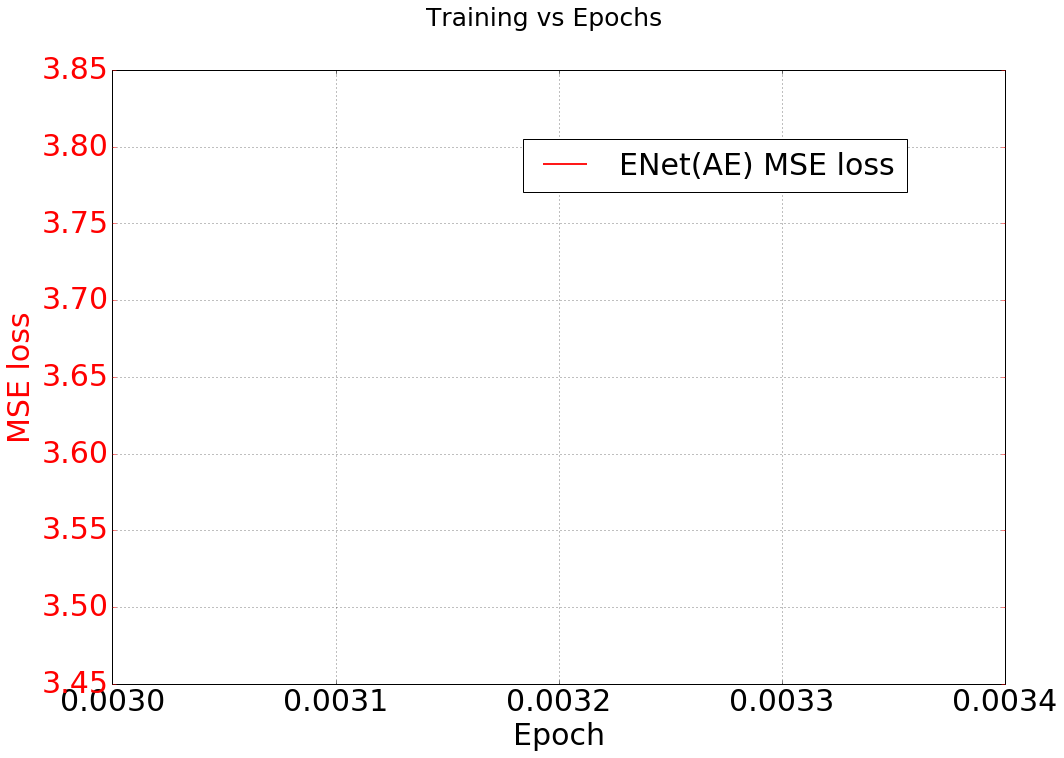

In [11]:
plot_log("20190715_174204", "ENet(AE)", None, "AE", "training")

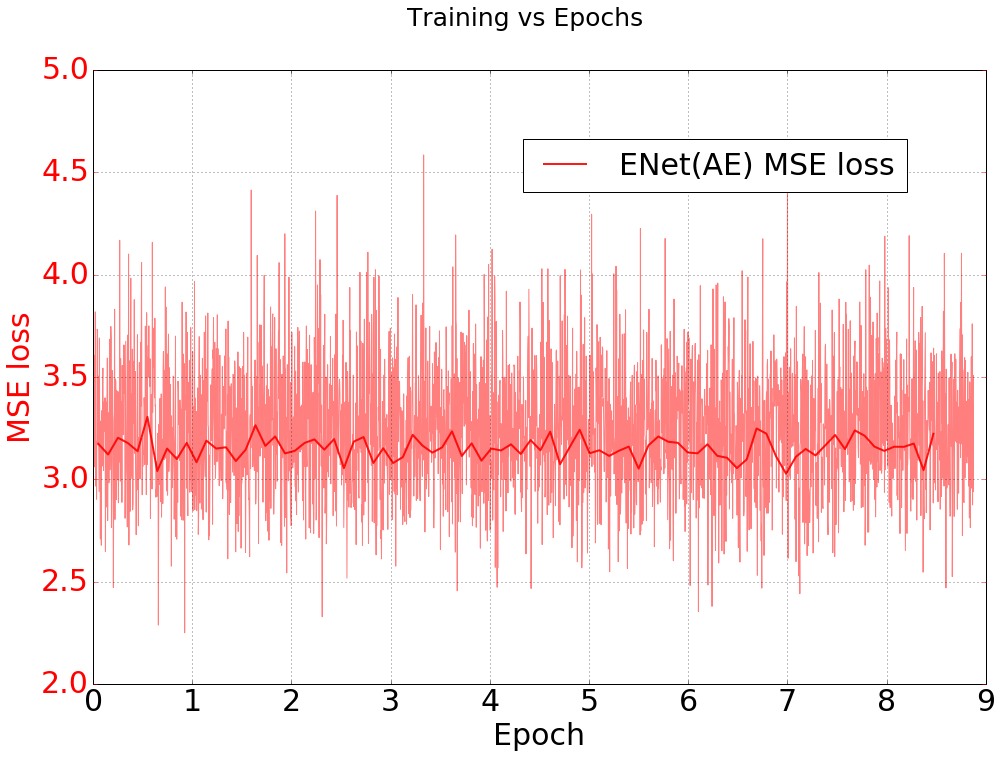

In [13]:
plot_log("20190715_182608", "ENet(AE)", None, "AE", "training")

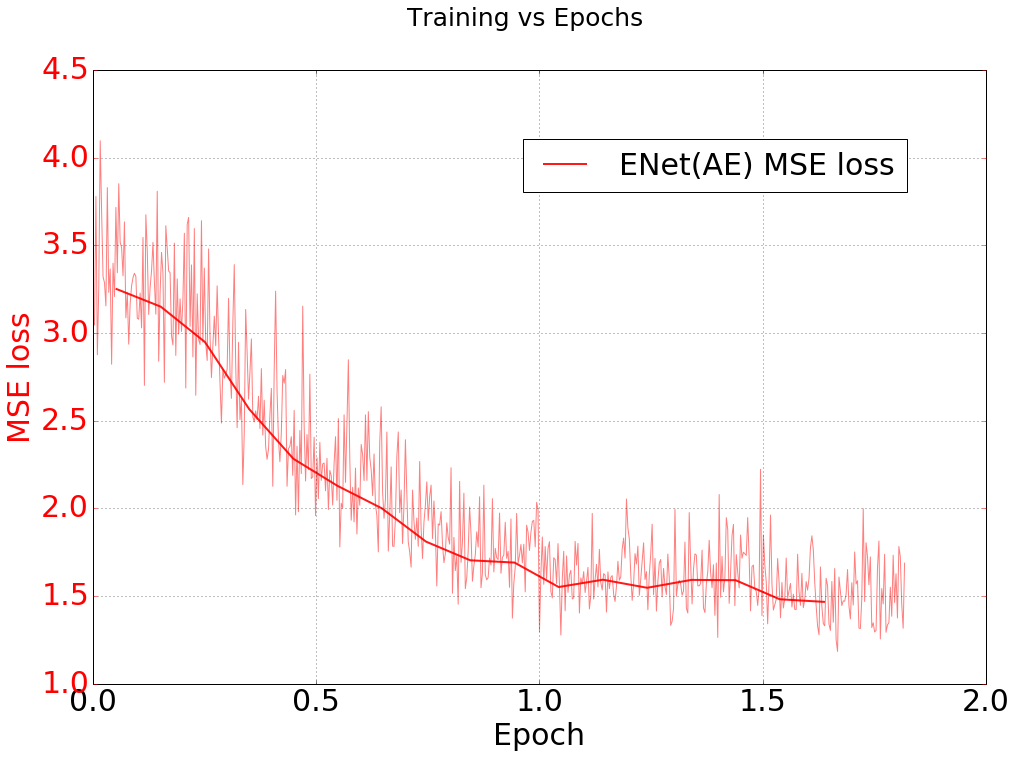

In [15]:
plot_log("20190715_185149", "ENet(AE)", None, "AE", "training")

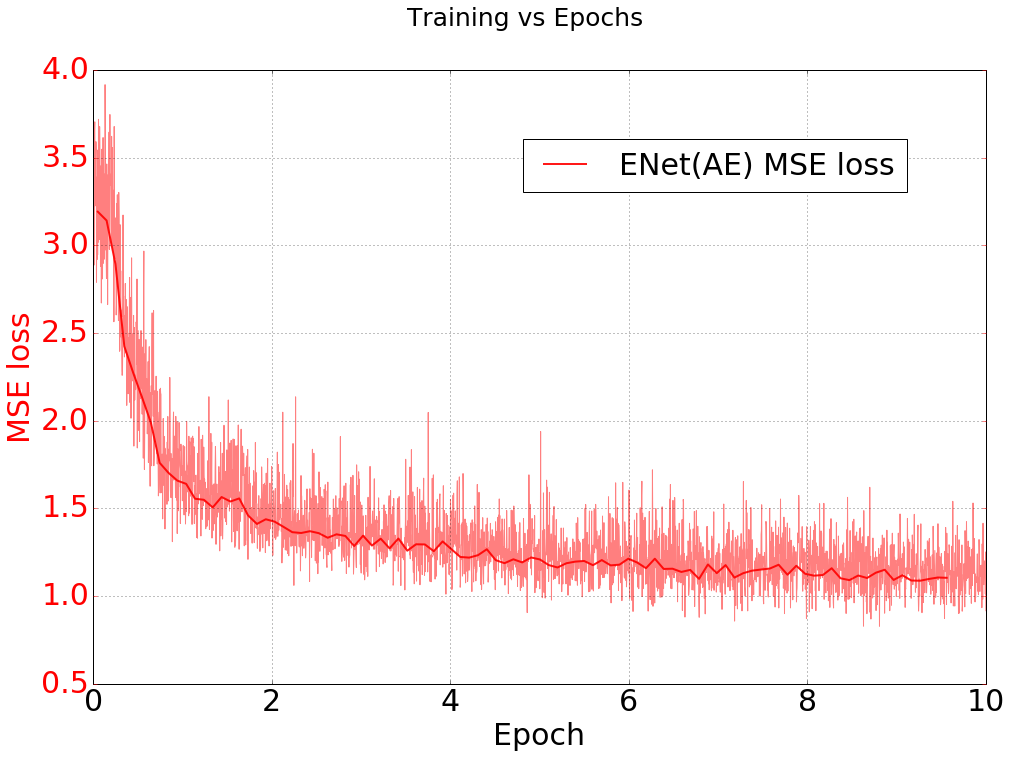

In [17]:
plot_log("20190715_185332", "ENet(AE)", None, "AE", "training")

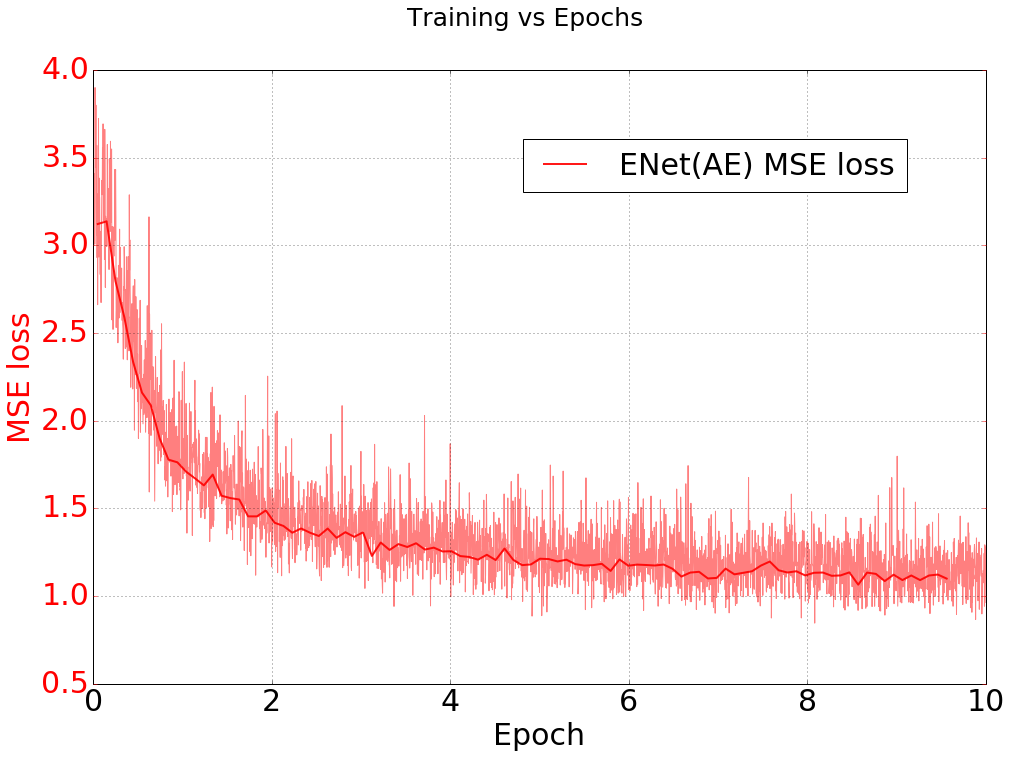

In [18]:
plot_log("20190715_190007", "ENet(AE)", None, "AE", "training")

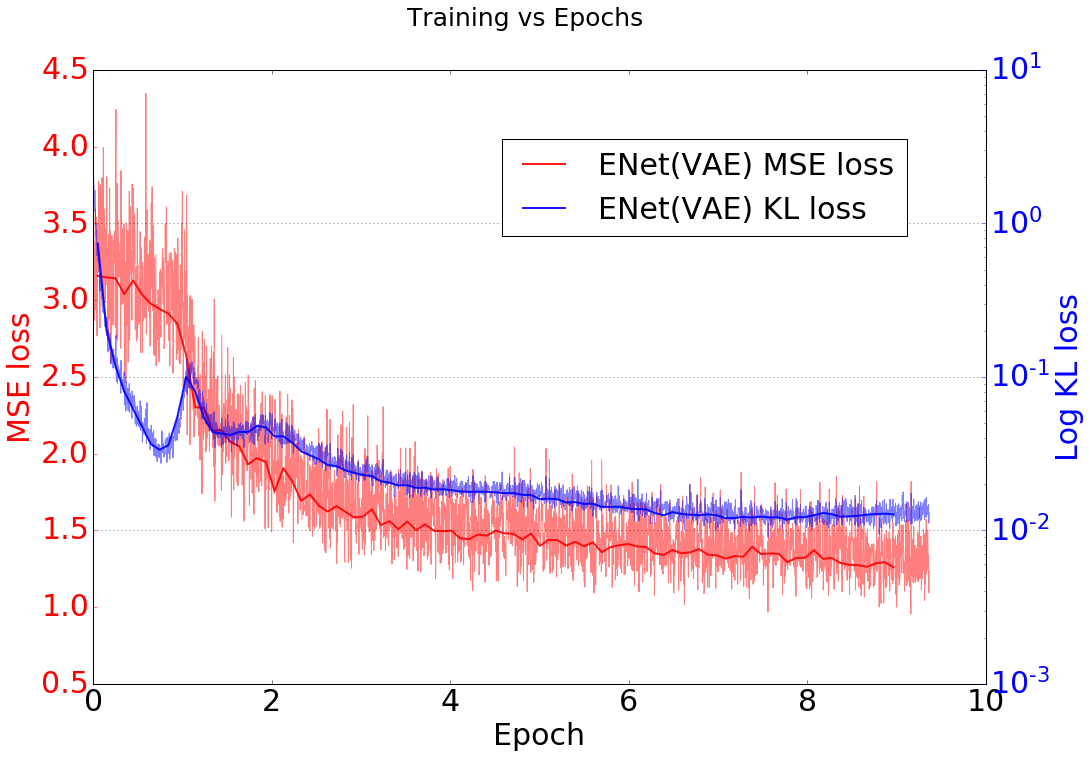

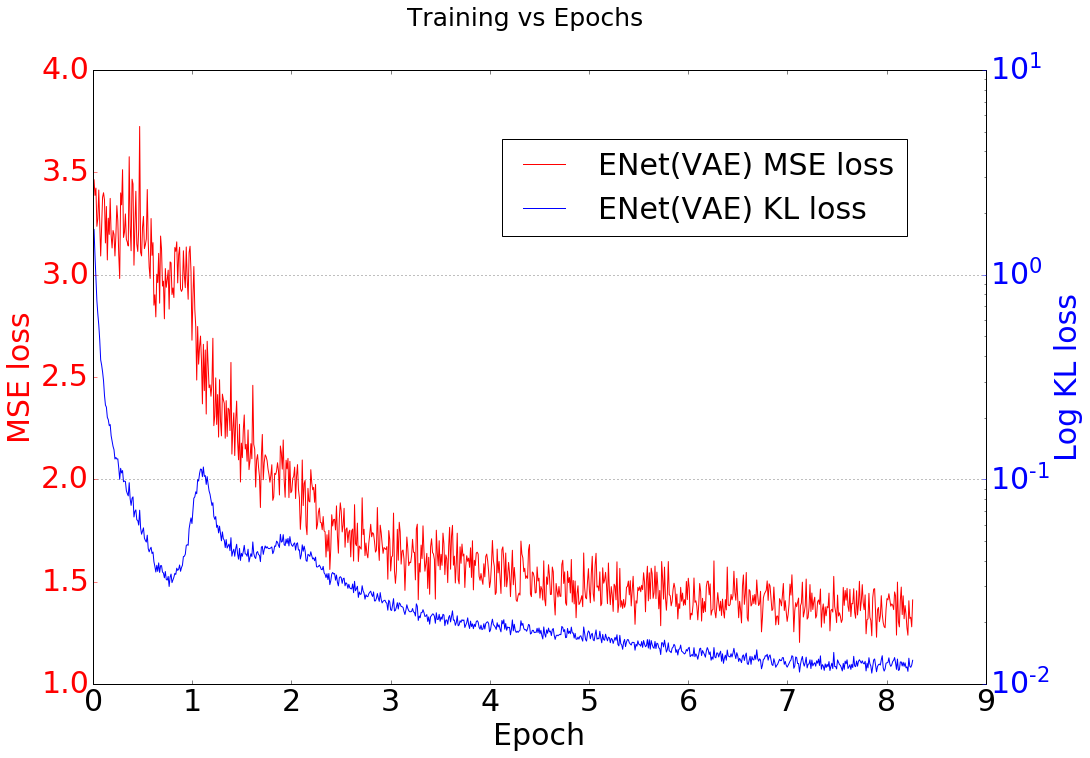

In [41]:
plot_log("20190715_212734", "ENet(VAE)", None, "VAE", "training")
plot_log("20190715_212734", "ENet(VAE)", None, "VAE", "training_validation")

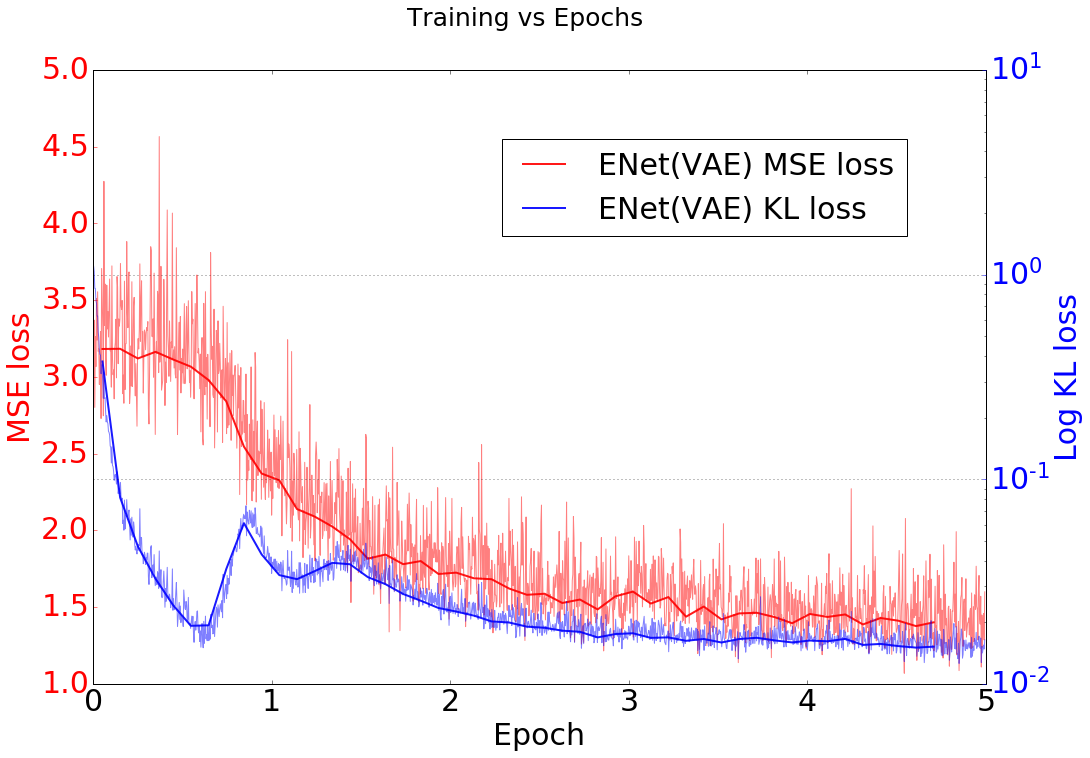

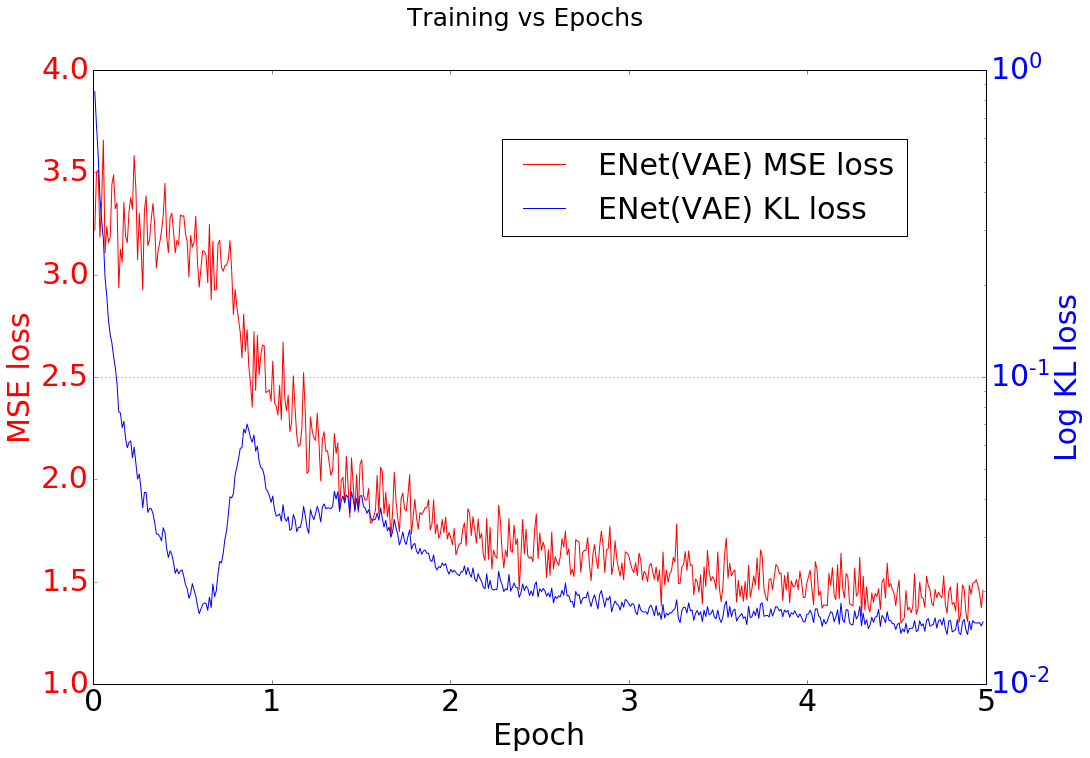

In [42]:
plot_log("20190715_215408", "ENet(VAE)", None, "VAE", "training")
plot_log("20190715_215408", "ENet(VAE)", None, "VAE", "training_validation")